<h1> Stock Analyses Notebook </h1>

<h2>Getting the stock data</h2>

In [23]:
import pandas as pd 
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt 

In [24]:
tickers = ["FROTO.IS", "THYAO.IS", "PASEU.IS", "VAKBN.IS","GARAN.IS","ORCAY.IS"]
start = "2021-01-01"
end = "2024-12-31"

In [25]:
count = len(tickers)
count

6

Tarihlerin yazımı "YY-AA-GG"" şeklindedir 

In [26]:
stock_data = yf.download(tickers, start, end)
stock_data.info()

[*********************100%***********************]  6 of 6 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2021-01-04 00:00:00+00:00 to 2024-12-30 00:00:00+00:00
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, FROTO.IS)  998 non-null    float64
 1   (Adj Close, GARAN.IS)  998 non-null    float64
 2   (Adj Close, ORCAY.IS)  571 non-null    float64
 3   (Adj Close, PASEU.IS)  388 non-null    float64
 4   (Adj Close, THYAO.IS)  998 non-null    float64
 5   (Adj Close, VAKBN.IS)  998 non-null    float64
 6   (Close, FROTO.IS)      998 non-null    float64
 7   (Close, GARAN.IS)      998 non-null    float64
 8   (Close, ORCAY.IS)      571 non-null    float64
 9   (Close, PASEU.IS)      388 non-null    float64
 10  (Close, THYAO.IS)      998 non-null    float64
 11  (Close, VAKBN.IS)      998 non-null    float64
 12  (High, FROTO.IS)       998 non-null    float64
 13  (High, GARAN.IS)       998 non-null    float64
 14  (High, OR

In [27]:
stock_close = stock_data.Close.copy()
stock_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2021-01-04 00:00:00+00:00 to 2024-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FROTO.IS  998 non-null    float64
 1   GARAN.IS  998 non-null    float64
 2   ORCAY.IS  571 non-null    float64
 3   PASEU.IS  388 non-null    float64
 4   THYAO.IS  998 non-null    float64
 5   VAKBN.IS  998 non-null    float64
dtypes: float64(6)
memory usage: 54.6 KB


In [28]:
stock_close.dropna()

Ticker,FROTO.IS,GARAN.IS,ORCAY.IS,PASEU.IS,THYAO.IS,VAKBN.IS
Date,,,,,,
2023-06-14 00:00:00+00:00,649.599976,29.320000,7.34,6.875000,182.899994,9.950000
2023-06-15 00:00:00+00:00,685.000000,30.660000,7.17,7.560000,183.000000,10.170000
2023-06-16 00:00:00+00:00,674.200012,30.080000,7.26,8.315000,180.699997,10.190000
2023-06-19 00:00:00+00:00,657.000000,29.420000,6.94,9.145000,174.000000,9.630000
2023-06-20 00:00:00+00:00,666.400024,30.660000,6.82,8.350000,171.399994,9.460000
...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,932.500000,126.500000,9.23,29.540001,285.500000,22.940001
2024-12-25 00:00:00+00:00,939.500000,133.300003,9.28,28.780001,288.250000,23.660000
2024-12-26 00:00:00+00:00,949.500000,131.000000,9.19,29.260000,290.000000,23.500000


In [29]:
print(stock_close.columns)

Index(['FROTO.IS', 'GARAN.IS', 'ORCAY.IS', 'PASEU.IS', 'THYAO.IS', 'VAKBN.IS'], dtype='object', name='Ticker')


In [30]:
stock_close.describe()

Ticker,FROTO.IS,GARAN.IS,ORCAY.IS,PASEU.IS,THYAO.IS,VAKBN.IS
count,998.000000,998.000000,571.000000,388.000000,998.000000,998.000000
mean,554.638778,40.823848,9.622121,17.861669,138.866904,10.244349
std,336.904187,37.400756,2.220321,4.723903,112.785115,6.693603
min,126.099998,6.620000,5.730000,6.875000,10.900000,3.220000
25%,246.849998,11.742500,7.865000,14.828125,23.585000,3.840000
50%,482.550003,25.420000,9.280000,17.025000,127.549999,9.235000
75%,885.250000,59.950000,11.215000,20.962501,255.750000,14.380000
max,1222.000000,133.300003,17.180000,29.540001,330.000000,25.520000


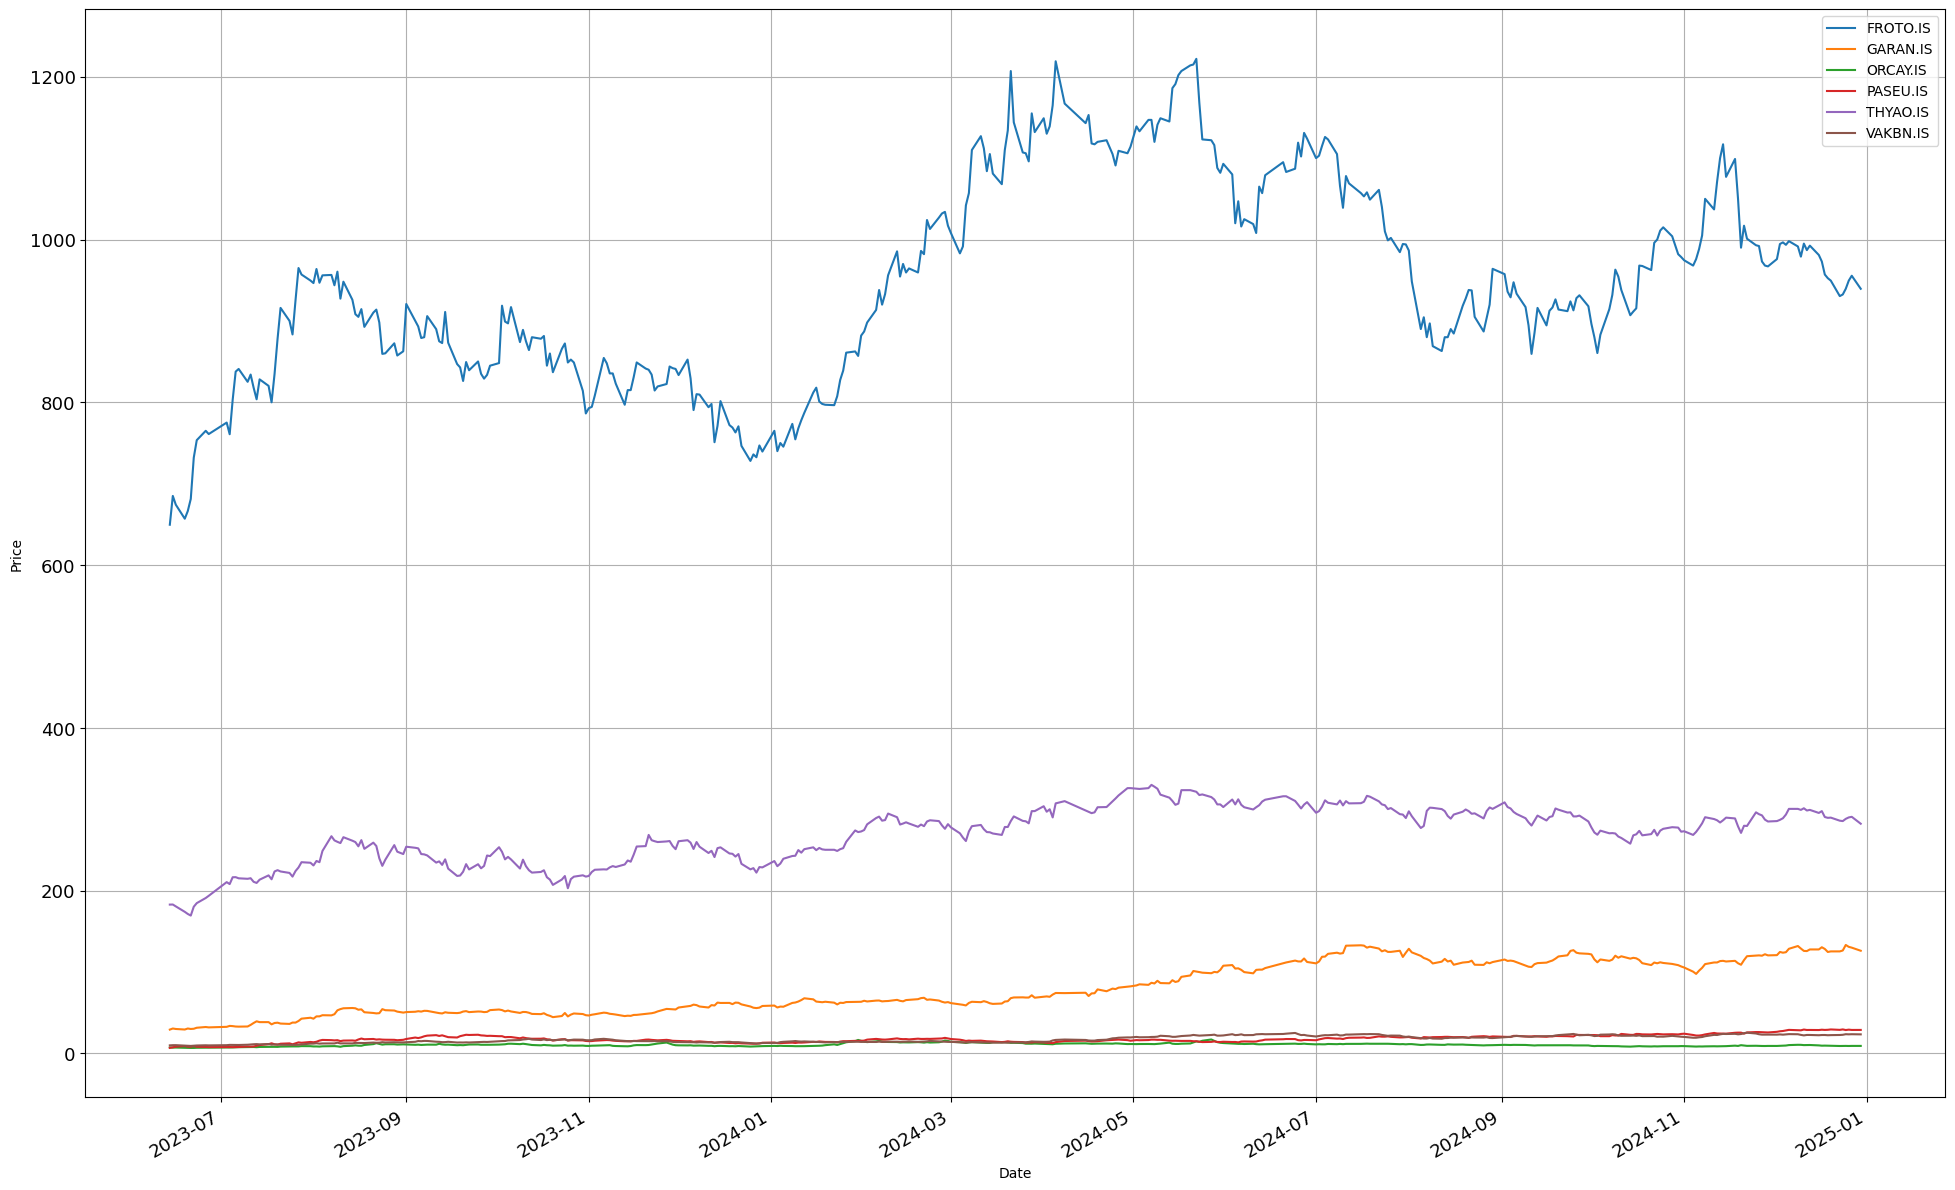

In [41]:
stock_close.dropna().plot(figsize = (24,16), fontsize = 13)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Hissenin son belirlenen tarihler arasındaki fiyat değişim tablosu 

- Bu çizelgede boş olan fiyatlar tablodan çıkartılmıştır. 
- Tarih uzunluğu 3-5 yıl arası olması öneriler. (Daha az data gürültüsü)

## Basit ve Logaritmik Getirilerin Hesaplanması 

In [32]:
stock_close

Ticker,FROTO.IS,GARAN.IS,ORCAY.IS,PASEU.IS,THYAO.IS,VAKBN.IS
Date,,,,,,
2021-01-04 00:00:00+00:00,126.099998,10.330000,NaN,NaN,12.68,4.730000
2021-01-05 00:00:00+00:00,133.100006,10.090000,NaN,NaN,12.58,4.730000
2021-01-06 00:00:00+00:00,137.000000,10.400000,NaN,NaN,12.68,4.840000
2021-01-07 00:00:00+00:00,134.000000,10.520000,NaN,NaN,12.68,4.910000
2021-01-08 00:00:00+00:00,135.600006,10.790000,NaN,NaN,12.84,4.980000
...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,932.500000,126.500000,9.23,29.540001,285.50,22.940001
2024-12-25 00:00:00+00:00,939.500000,133.300003,9.28,28.780001,288.25,23.660000
2024-12-26 00:00:00+00:00,949.500000,131.000000,9.19,29.260000,290.00,23.500000


#### Basit Getiri Hesaplaması (Simple Return)

In [33]:
simple_return_table = pd.DataFrame()
for ticker in tickers:
    simple_return_serie = stock_close[ticker].pct_change()
    simple_return_table[ticker] = simple_return_serie 
simple_return_table

/var/folders/hf/kdtlw_gj1qd7yh6kbwj63n640000gn/T/ipykernel_16636/2583304659.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simple_return_serie = stock_close[ticker].pct_change()
/var/folders/hf/kdtlw_gj1qd7yh6kbwj63n640000gn/T/ipykernel_16636/2583304659.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simple_return_serie = stock_close[ticker].pct_change()
/var/folders/hf/kdtlw_gj1qd7yh6kbwj63n640000gn/T/ipykernel_16636/2583304659.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA

,FROTO.IS,THYAO.IS,PASEU.IS,VAKBN.IS,GARAN.IS,ORCAY.IS
Date,,,,,,
2021-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00+00:00,0.055512,-0.007886,NaN,0.000000,-0.023233,NaN
2021-01-06 00:00:00+00:00,0.029301,0.007949,NaN,0.023256,0.030723,NaN
2021-01-07 00:00:00+00:00,-0.021898,0.000000,NaN,0.014463,0.011539,NaN
2021-01-08 00:00:00+00:00,0.011940,0.012618,NaN,0.014257,0.025665,NaN
...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,0.002149,-0.001748,0.018621,0.010573,0.008772,0.005447
2024-12-25 00:00:00+00:00,0.007507,0.009632,-0.025728,0.031386,0.053755,0.005417
2024-12-26 00:00:00+00:00,0.010644,0.006071,0.016678,-0.006762,-0.017254,-0.009698


In [34]:
log_return_table = pd.DataFrame()
for ticker in tickers: 
    log_return_serie = np.log(stock_close[ticker]/ stock_close[ticker].shift())
    log_return_table[ticker] = log_return_serie
log_return_table

,FROTO.IS,THYAO.IS,PASEU.IS,VAKBN.IS,GARAN.IS,ORCAY.IS
Date,,,,,,
2021-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00+00:00,0.054026,-0.007918,NaN,0.000000,-0.023507,NaN
2021-01-06 00:00:00+00:00,0.028880,0.007918,NaN,0.022990,0.030261,NaN
2021-01-07 00:00:00+00:00,-0.022141,0.000000,NaN,0.014359,0.011472,NaN
2021-01-08 00:00:00+00:00,0.011870,0.012539,NaN,0.014156,0.025342,NaN
...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,0.002147,-0.001750,0.018449,0.010517,0.008734,0.005432
2024-12-25 00:00:00+00:00,0.007479,0.009586,-0.026065,0.030904,0.052360,0.005403
2024-12-26 00:00:00+00:00,0.010588,0.006053,0.016541,-0.006785,-0.017405,-0.009746


### Ödül-Risk Oranı (Reward-Risk)

Ödül ve riskin, logaritmik getiriler üzerinden belirlenmesi. Bu kısımda ödül ve riski bir python-dictionary sözlük içinde saklayıp, pyplot ile çizimi yapılıyor.

- Yıllık hesaplama yapılmak isteniyorsa: 252 gün 
- Çeyreklik: 52
- Aylık: 12
- Haftalık: 4
- Günlük'te ise hesaplama yapılmasına gerek yok. 

__Risk ve Ödül Hesaplaması:__

In [43]:
risk_reward_table = pd.DataFrame()
risk_reward_table["Risk"] = log_return_table.std().to_frame().copy() * 252
risk_reward_table["Reward"] = log_return_table.mean().to_frame().copy() * 252
risk_reward_table

,Risk,Reward
FROTO.IS,7.187811,0.513375
THYAO.IS,6.903008,0.794602
PASEU.IS,9.806925,0.935488
VAKBN.IS,7.800997,0.413123
GARAN.IS,7.391548,0.631712
ORCAY.IS,9.251520,0.126950


In [44]:
log_return_table.describe()

,FROTO.IS,THYAO.IS,PASEU.IS,VAKBN.IS,GARAN.IS,ORCAY.IS
count,996.000000,996.000000,387.000000,996.000000,996.000000,569.000000
mean,0.002037,0.003153,0.003712,0.001639,0.002507,0.000504
std,0.028523,0.027393,0.038916,0.030956,0.029332,0.036712
min,-0.105175,-0.105160,-0.104960,-0.105187,-0.105277,-0.105277
25%,-0.014661,-0.012830,-0.020277,-0.014067,-0.013669,-0.020021
50%,0.000084,0.001433,0.000000,0.000000,0.000334,0.000000
75%,0.017758,0.018207,0.023142,0.015944,0.017919,0.018754
max,0.157647,0.195996,0.095310,0.164789,0.163332,0.179992


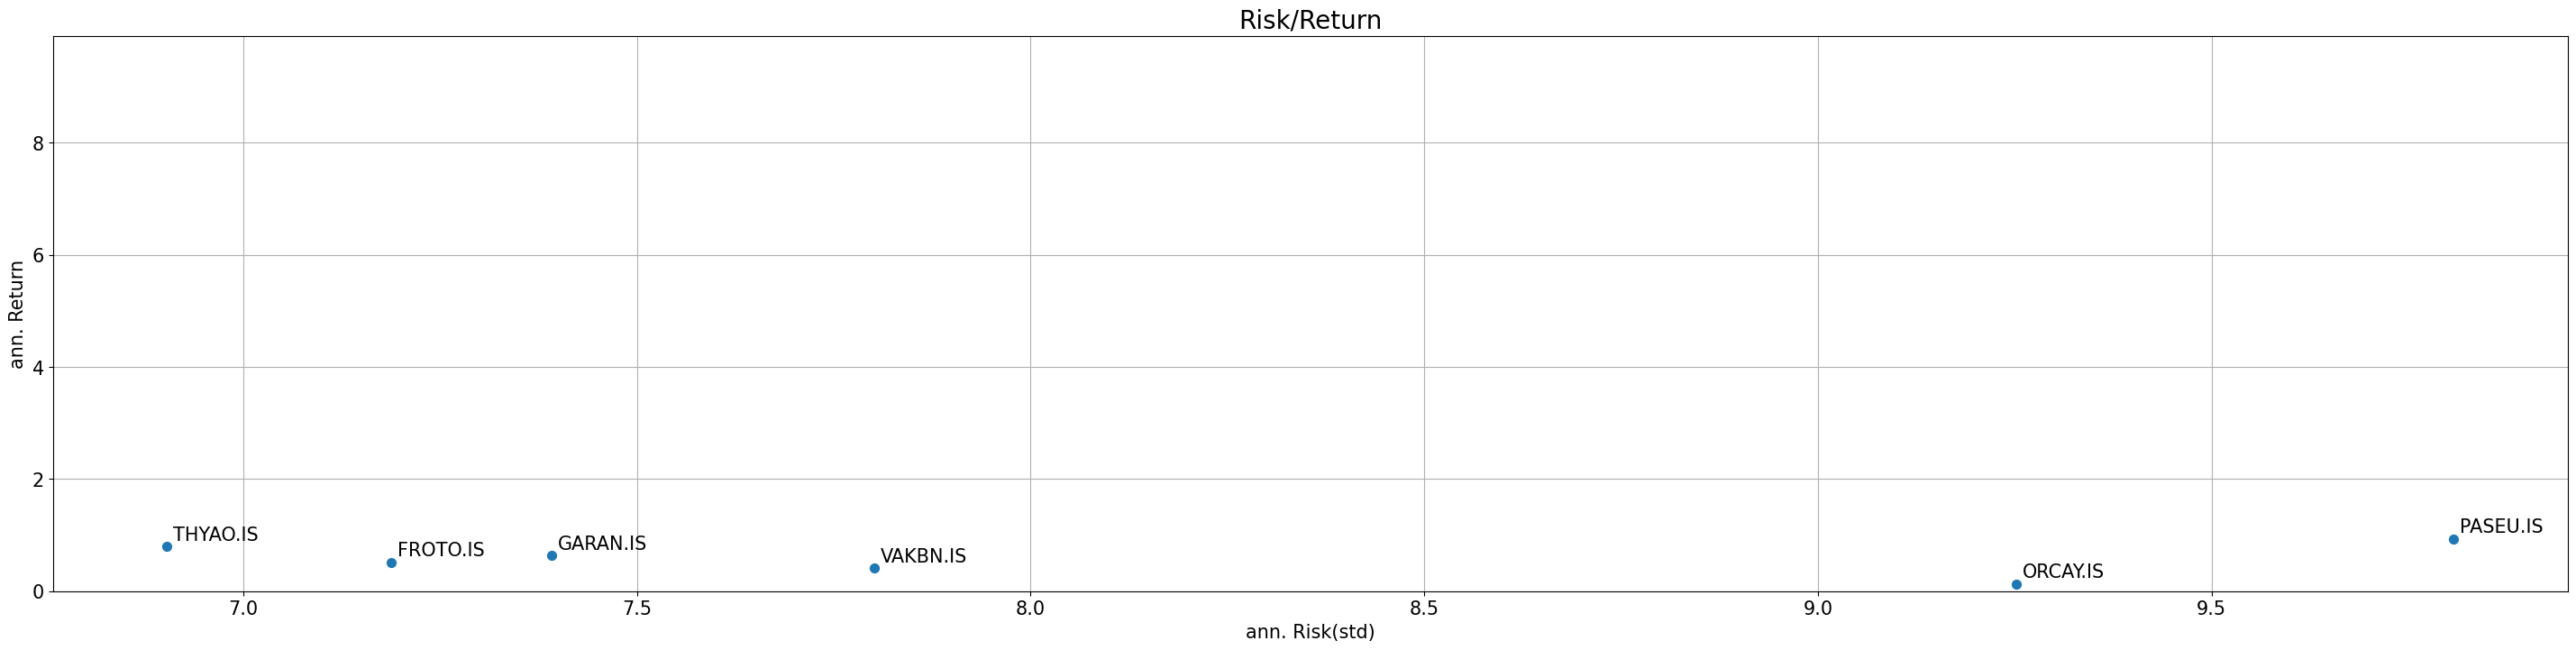

In [45]:
import matplotlib.pyplot as plt

# Assuming risk_reward_table is already defined and contains the correct data
risk_reward_table.plot(kind="scatter", x="Risk", y="Reward", figsize=(36, 8), s=50, fontsize=15)
plt.grid(True)
for i in risk_reward_table.index:
    plt.annotate(i, xy=(risk_reward_table.loc[i, "Risk"], risk_reward_table.loc[i, "Reward"]),
                 xytext=(5, 5), textcoords='offset points', size=15)

plt.ylim(0, risk_reward_table["Risk"].max() + 0.1)
plt.xlabel("ann. Risk(std)", fontsize=15)
plt.ylabel("ann. Return", fontsize=15)
plt.title("Risk/Return", fontsize=20)
plt.show()

## Fiyatların Belli Bir Zaman Dilimninde Toplanması 

In [46]:
freqs = ["YE", "QE", "ME", "W-FRI", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [47]:
for i in range(5): 
    resamp = stock_close.resample